In [22]:
# Neural Network Model (Multi-Layer Perceptron)
# House Prices - Advanced Regression Techniques
# Capstone Project

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set visualization style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

print("Libraries imported successfully!")
print("="*80)

Libraries imported successfully!


In [23]:
# ============================================================================
# 1. LOAD PREPROCESSED DATA
# ============================================================================

print("\n1. LOADING PREPROCESSED DATA")
print("-" * 80)

# Load the preprocessed data
train_data = pd.read_csv('../data/train_processed.csv')
test_data = pd.read_csv('../data/test_processed.csv')

print(f"Training data shape: {train_data.shape}")
print(f"Test data shape: {test_data.shape}")

# Separate features and target
X = train_data.drop('SalePrice', axis=1)
y = train_data['SalePrice']

print(f"\nFeatures shape: {X.shape}")
print(f"Target shape: {y.shape}")
print(f"Number of features: {X.shape[1]}")


1. LOADING PREPROCESSED DATA
--------------------------------------------------------------------------------
Training data shape: (1460, 265)
Test data shape: (1459, 264)

Features shape: (1460, 264)
Target shape: (1460,)
Number of features: 264


In [24]:
# ============================================================================
# 2. TRAIN-TEST SPLIT
# ============================================================================

print("\n2. CREATING TRAIN-VALIDATION SPLIT")
print("-" * 80)

# Split data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Validation set size: {X_val.shape[0]} samples")
print(f"Split ratio: 80-20")


2. CREATING TRAIN-VALIDATION SPLIT
--------------------------------------------------------------------------------
Training set size: 1168 samples
Validation set size: 292 samples
Split ratio: 80-20


In [25]:
# ============================================================================
# 3. FEATURE SCALING
# ============================================================================

print("\n3. FEATURE SCALING")
print("-" * 80)

# Neural networks require feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(test_data)

print("StandardScaler applied to all features")
print(f"Mean of scaled training features: {X_train_scaled.mean():.6f}")
print(f"Std of scaled training features: {X_train_scaled.std():.6f}")
print("\nNote: Feature scaling is crucial for neural networks!")


3. FEATURE SCALING
--------------------------------------------------------------------------------
StandardScaler applied to all features
Mean of scaled training features: 0.000000
Std of scaled training features: 0.996205

Note: Feature scaling is crucial for neural networks!


In [26]:
# ============================================================================
# 4. HYPERPARAMETER TUNING
# ============================================================================

print("\n4. HYPERPARAMETER TUNING")
print("-" * 80)

print("\nSearching for optimal hyperparameters...")
print("This may take a few minutes...\n")

# Define parameter grid
param_grid = {
    'hidden_layer_sizes': [(64,), (128,), (64, 32), (128, 64), (128, 64, 32)],
    'activation': ['relu', 'tanh'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate_init': [0.001, 0.01],
    'max_iter': [500]
}

# Initialize model
mlp_grid = MLPRegressor(random_state=42, early_stopping=True, validation_fraction=0.1)

# Perform grid search
grid_search = GridSearchCV(
    mlp_grid, param_grid, cv=3, scoring='neg_mean_squared_error', 
    n_jobs=-1, verbose=1
)
grid_search.fit(X_train_scaled, y_train)

print(f"\nBest Parameters Found:")
for param, value in grid_search.best_params_.items():
    print(f"  {param}: {value}")

print(f"\nBest CV RMSE: {np.sqrt(-grid_search.best_score_):.6f}")


4. HYPERPARAMETER TUNING
--------------------------------------------------------------------------------

Searching for optimal hyperparameters...
This may take a few minutes...

Fitting 3 folds for each of 60 candidates, totalling 180 fits

Best Parameters Found:
  activation: relu
  alpha: 0.01
  hidden_layer_sizes: (128, 64)
  learning_rate_init: 0.001
  max_iter: 500

Best CV RMSE: 1.099114


In [27]:
# ============================================================================
# 5. MODEL TRAINING
# ============================================================================

print("\n5. TRAINING NEURAL NETWORK MODEL")
print("-" * 80)

# Extract best parameters
best_params = grid_search.best_params_

# Train the model with best parameters
nn_model = MLPRegressor(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    alpha=best_params['alpha'],
    learning_rate_init=best_params['learning_rate_init'],
    max_iter=1000,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    n_iter_no_change=20,
    verbose=False
)

print("Training neural network...")
nn_model.fit(X_train_scaled, y_train)
print("✓ Model training complete!")

# Display model architecture
print(f"\nModel Architecture:")
print(f"  Input layer: {X.shape[1]} features")
for i, layer_size in enumerate(nn_model.hidden_layer_sizes if isinstance(nn_model.hidden_layer_sizes, tuple) else (nn_model.hidden_layer_sizes,), 1):
    print(f"  Hidden layer {i}: {layer_size} neurons")
print(f"  Output layer: 1 neuron")
print(f"  Total layers: {len(nn_model.hidden_layer_sizes) + 2 if isinstance(nn_model.hidden_layer_sizes, tuple) else 3}")

print(f"\nTraining Details:")
print(f"  Activation function: {nn_model.activation}")
print(f"  Alpha (L2 penalty): {nn_model.alpha}")
print(f"  Learning rate: {nn_model.learning_rate_init}")
print(f"  Iterations completed: {nn_model.n_iter_}")
print(f"  Loss: {nn_model.loss_:.6f}")


5. TRAINING NEURAL NETWORK MODEL
--------------------------------------------------------------------------------
Training neural network...
✓ Model training complete!

Model Architecture:
  Input layer: 264 features
  Hidden layer 1: 128 neurons
  Hidden layer 2: 64 neurons
  Output layer: 1 neuron
  Total layers: 4

Training Details:
  Activation function: relu
  Alpha (L2 penalty): 0.01
  Learning rate: 0.001
  Iterations completed: 155
  Loss: 0.008948



6. TRAINING HISTORY
--------------------------------------------------------------------------------


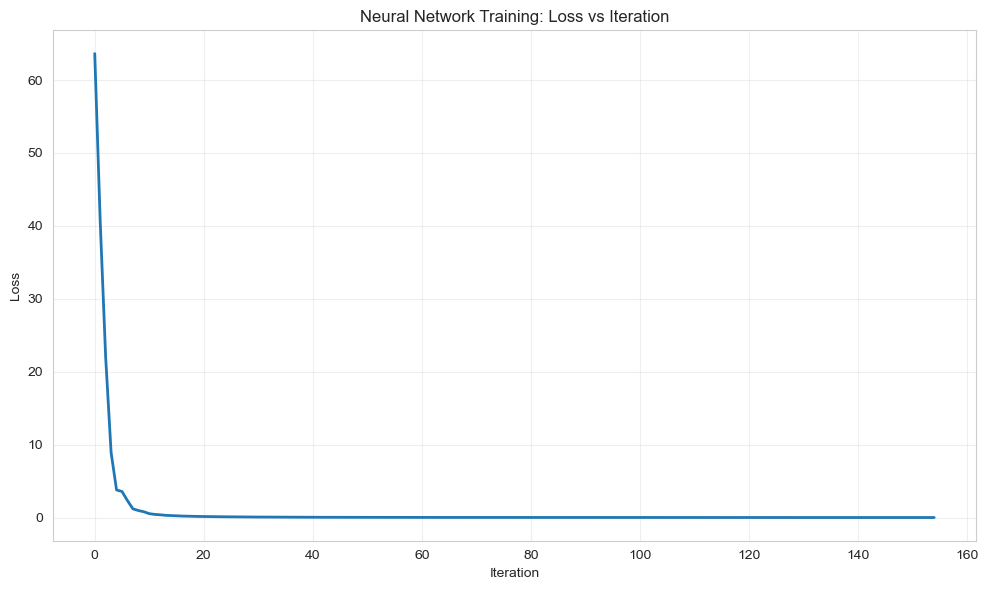

✓ Training loss plot saved

Final training loss: 0.008948
Initial training loss: 63.619575
Loss reduction: 99.99%


In [28]:
# ============================================================================
# 6. TRAINING HISTORY VISUALIZATION
# ============================================================================

print("\n6. TRAINING HISTORY")
print("-" * 80)

# Plot loss curve
plt.figure(figsize=(10, 6))
plt.plot(nn_model.loss_curve_, linewidth=2)
plt.xlabel('Iteration')
plt.ylabel('Loss')
plt.title('Neural Network Training: Loss vs Iteration')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('../results/visualizations/nn_training_loss.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Training loss plot saved")
print(f"\nFinal training loss: {nn_model.loss_curve_[-1]:.6f}")
print(f"Initial training loss: {nn_model.loss_curve_[0]:.6f}")
print(f"Loss reduction: {((nn_model.loss_curve_[0] - nn_model.loss_curve_[-1]) / nn_model.loss_curve_[0] * 100):.2f}%")

In [29]:
# ============================================================================
# 7. MODEL EVALUATION
# ============================================================================

print("\n7. MODEL EVALUATION")
print("-" * 80)

# Make predictions
y_train_pred = nn_model.predict(X_train_scaled)
y_val_pred = nn_model.predict(X_val_scaled)

# Calculate metrics for training set
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
train_mae = mean_absolute_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

# Calculate metrics for validation set
val_rmse = np.sqrt(mean_squared_error(y_val, y_val_pred))
val_mae = mean_absolute_error(y_val, y_val_pred)
val_r2 = r2_score(y_val, y_val_pred)

print("\nTRAINING SET PERFORMANCE:")
print(f"  RMSE: {train_rmse:.6f}")
print(f"  MAE:  {train_mae:.6f}")
print(f"  R²:   {train_r2:.6f}")

print("\nVALIDATION SET PERFORMANCE:")
print(f"  RMSE: {val_rmse:.6f}")
print(f"  MAE:  {val_mae:.6f}")
print(f"  R²:   {val_r2:.6f}")

# Calculate percentage difference to check overfitting
rmse_diff = abs(train_rmse - val_rmse) / train_rmse * 100
print(f"\nRMSE difference (train vs val): {rmse_diff:.2f}%")

if rmse_diff < 10:
    print("✓ Model shows good generalization (< 10% difference)")
elif rmse_diff < 20:
    print("⚠ Model shows moderate overfitting (10-20% difference)")
else:
    print("✗ Model shows significant overfitting (> 20% difference)")


7. MODEL EVALUATION
--------------------------------------------------------------------------------

TRAINING SET PERFORMANCE:
  RMSE: 0.248599
  MAE:  0.084748
  R²:   0.594590

VALIDATION SET PERFORMANCE:
  RMSE: 0.869359
  MAE:  0.642444
  R²:   -3.050054

RMSE difference (train vs val): 249.70%
✗ Model shows significant overfitting (> 20% difference)


In [30]:
# ============================================================================
# 8. CROSS-VALIDATION
# ============================================================================

print("\n8. CROSS-VALIDATION ANALYSIS")
print("-" * 80)

# Perform k-fold cross-validation with the best model
# Note: This will take some time
print("\nPerforming 5-fold cross-validation...")
print("(This may take several minutes due to neural network training)")

kfold = KFold(n_splits=5, shuffle=True, random_state=42)

# Use a simpler model for CV to save time
cv_model = MLPRegressor(
    hidden_layer_sizes=best_params['hidden_layer_sizes'],
    activation=best_params['activation'],
    alpha=best_params['alpha'],
    learning_rate_init=best_params['learning_rate_init'],
    max_iter=500,
    random_state=42,
    early_stopping=True,
    validation_fraction=0.1,
    verbose=False
)

cv_scores = cross_val_score(
    cv_model, X_train_scaled, y_train, 
    cv=kfold, scoring='neg_mean_squared_error', n_jobs=-1
)
cv_rmse_scores = np.sqrt(-cv_scores)

print(f"\n5-Fold Cross-Validation RMSE Scores:")
for i, score in enumerate(cv_rmse_scores, 1):
    print(f"  Fold {i}: {score:.6f}")

print(f"\nCross-Validation Statistics:")
print(f"  Mean RMSE: {cv_rmse_scores.mean():.6f}")
print(f"  Std RMSE:  {cv_rmse_scores.std():.6f}")
print(f"  95% CI:    [{cv_rmse_scores.mean() - 1.96*cv_rmse_scores.std():.6f}, "
      f"{cv_rmse_scores.mean() + 1.96*cv_rmse_scores.std():.6f}]")


8. CROSS-VALIDATION ANALYSIS
--------------------------------------------------------------------------------

Performing 5-fold cross-validation...
(This may take several minutes due to neural network training)

5-Fold Cross-Validation RMSE Scores:
  Fold 1: 0.917207
  Fold 2: 0.920095
  Fold 3: 1.230944
  Fold 4: 1.091657
  Fold 5: 1.190462

Cross-Validation Statistics:
  Mean RMSE: 1.070073
  Std RMSE:  0.131682
  95% CI:    [0.811977, 1.328169]


In [31]:
# ============================================================================
# 9. COMPARISON WITH LINEAR MODELS
# ============================================================================

print("\n9. COMPARISON WITH LINEAR MODELS")
print("-" * 80)

# Load previous model results if available
try:
    lr_metrics = pd.read_csv('lr_metrics.csv')
    ridge_metrics = pd.read_csv('ridge_metrics.csv')
    
    print("\nValidation RMSE Comparison:")
    print(f"  Linear Regression:  {lr_metrics['Val_RMSE'].values[0]:.6f}")
    print(f"  Ridge Regression:   {ridge_metrics['Val_RMSE'].values[0]:.6f}")
    print(f"  Neural Network:     {val_rmse:.6f}")
    
    # Determine best model
    models = {
        'Linear': lr_metrics['Val_RMSE'].values[0],
        'Ridge': ridge_metrics['Val_RMSE'].values[0],
        'Neural Network': val_rmse
    }
    best_model = min(models, key=models.get)
    print(f"\n  Best Model: {best_model} (RMSE: {models[best_model]:.6f})")
    
except FileNotFoundError:
    print("\nPrevious model results not found. Run linear_regression.ipynb and ridge_regression.ipynb first for comparison.")


9. COMPARISON WITH LINEAR MODELS
--------------------------------------------------------------------------------

Previous model results not found. Run linear_regression.ipynb and ridge_regression.ipynb first for comparison.



10. RESIDUAL ANALYSIS
--------------------------------------------------------------------------------


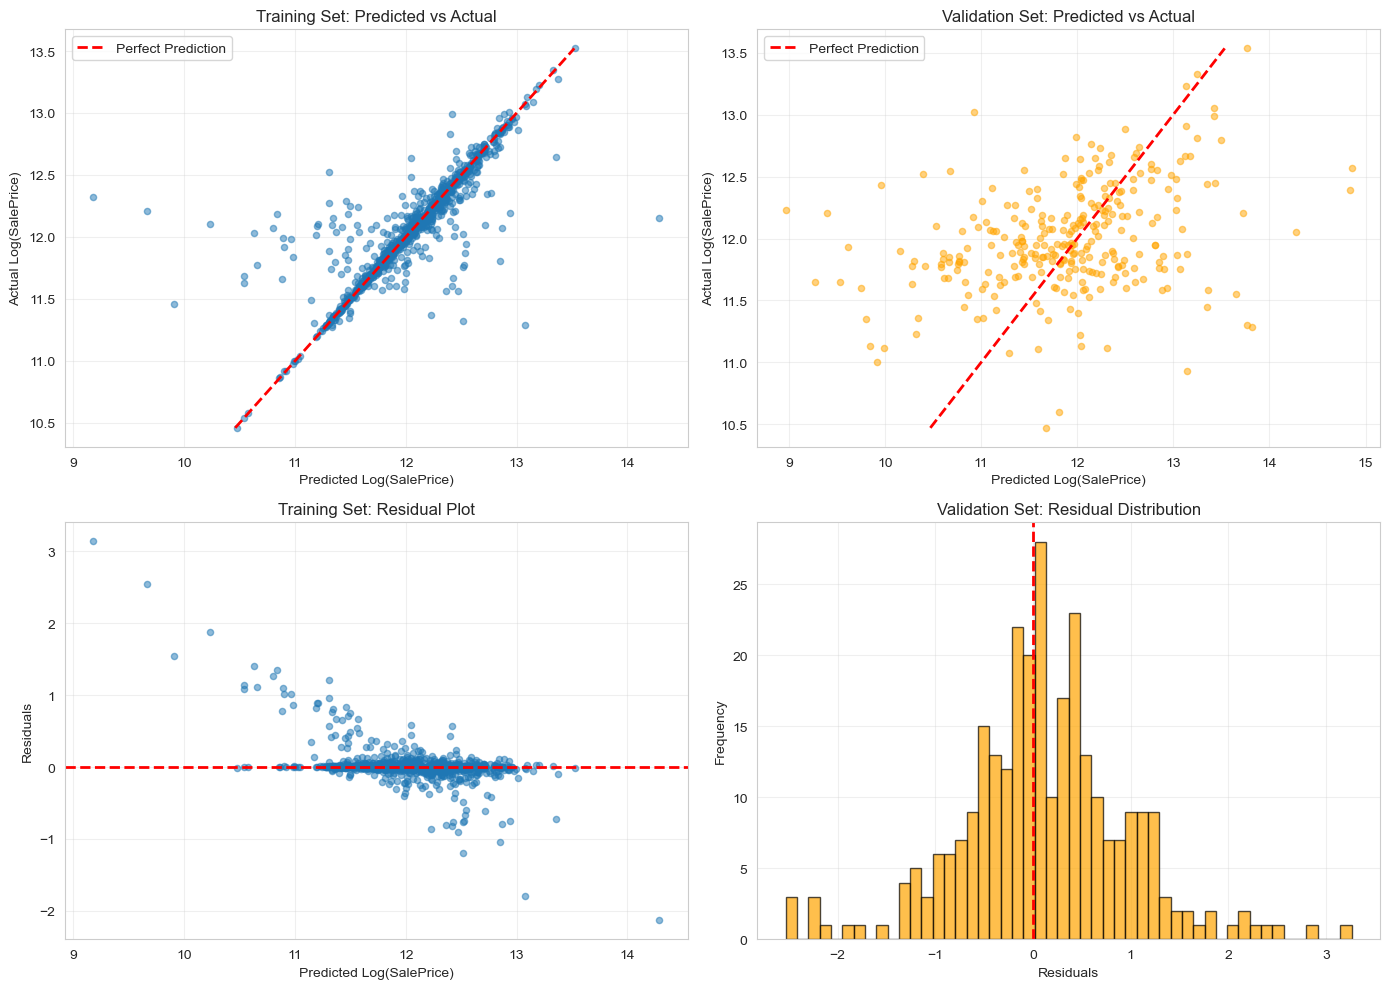

✓ Residual analysis plots saved

Residual Statistics (Validation Set):
  Mean: 0.110133 (should be close to 0)
  Std:  0.863835
  Min:  -2.531796
  Max:  3.264870


In [32]:
# ============================================================================
# 10. RESIDUAL ANALYSIS
# ============================================================================

print("\n10. RESIDUAL ANALYSIS")
print("-" * 80)

# Calculate residuals
train_residuals = y_train - y_train_pred
val_residuals = y_val - y_val_pred

# Create residual plots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Predicted vs Actual (Training)
axes[0, 0].scatter(y_train_pred, y_train, alpha=0.5, s=20)
axes[0, 0].plot([y_train.min(), y_train.max()], 
                [y_train.min(), y_train.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 0].set_xlabel('Predicted Log(SalePrice)')
axes[0, 0].set_ylabel('Actual Log(SalePrice)')
axes[0, 0].set_title('Training Set: Predicted vs Actual')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2. Predicted vs Actual (Validation)
axes[0, 1].scatter(y_val_pred, y_val, alpha=0.5, s=20, color='orange')
axes[0, 1].plot([y_val.min(), y_val.max()], 
                [y_val.min(), y_val.max()], 
                'r--', lw=2, label='Perfect Prediction')
axes[0, 1].set_xlabel('Predicted Log(SalePrice)')
axes[0, 1].set_ylabel('Actual Log(SalePrice)')
axes[0, 1].set_title('Validation Set: Predicted vs Actual')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3. Residual Plot (Training)
axes[1, 0].scatter(y_train_pred, train_residuals, alpha=0.5, s=20)
axes[1, 0].axhline(y=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Predicted Log(SalePrice)')
axes[1, 0].set_ylabel('Residuals')
axes[1, 0].set_title('Training Set: Residual Plot')
axes[1, 0].grid(True, alpha=0.3)

# 4. Residual Distribution (Validation)
axes[1, 1].hist(val_residuals, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 1].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 1].set_xlabel('Residuals')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].set_title('Validation Set: Residual Distribution')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/visualizations/nn_residual_analysis.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Residual analysis plots saved")

# Statistical tests for residuals
print(f"\nResidual Statistics (Validation Set):")
print(f"  Mean: {val_residuals.mean():.6f} (should be close to 0)")
print(f"  Std:  {val_residuals.std():.6f}")
print(f"  Min:  {val_residuals.min():.6f}")
print(f"  Max:  {val_residuals.max():.6f}")


11. PREDICTION ERROR ANALYSIS
--------------------------------------------------------------------------------
Mean Absolute Percentage Error (MAPE):
  Training:   8.56%
  Validation: 79.68%


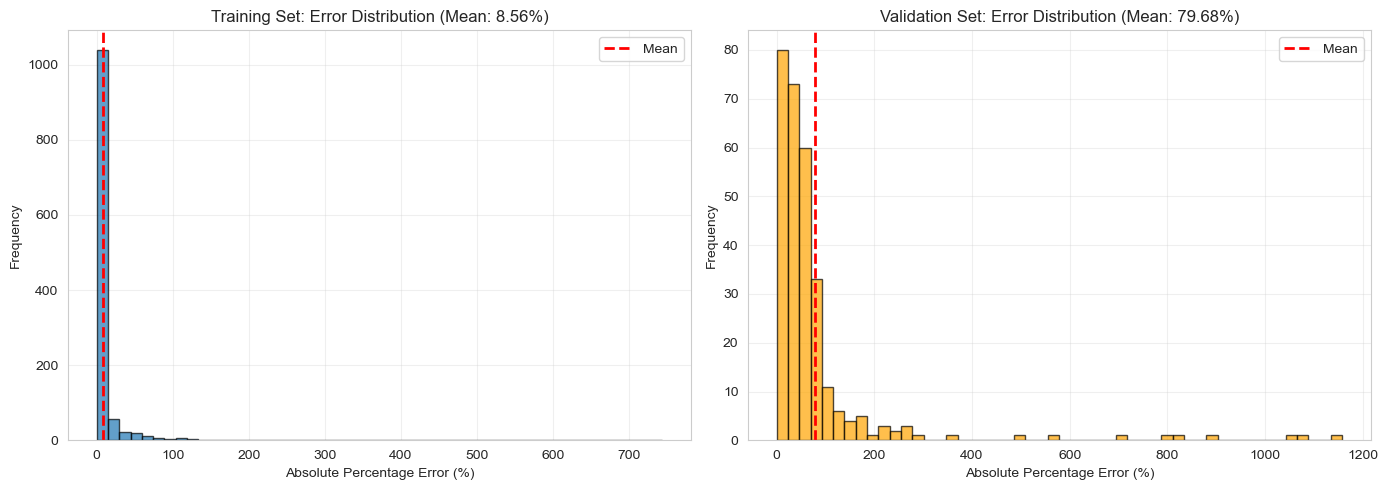

✓ Error distribution plots saved


In [33]:
# ============================================================================
# 11. PREDICTION ERROR DISTRIBUTION
# ============================================================================

print("\n11. PREDICTION ERROR ANALYSIS")
print("-" * 80)

# Calculate absolute percentage errors (on original scale)
y_train_original = np.expm1(y_train)
y_train_pred_original = np.expm1(y_train_pred)
y_val_original = np.expm1(y_val)
y_val_pred_original = np.expm1(y_val_pred)

train_ape = np.abs((y_train_original - y_train_pred_original) / y_train_original) * 100
val_ape = np.abs((y_val_original - y_val_pred_original) / y_val_original) * 100

print(f"Mean Absolute Percentage Error (MAPE):")
print(f"  Training:   {train_ape.mean():.2f}%")
print(f"  Validation: {val_ape.mean():.2f}%")

# Visualize error distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(train_ape, bins=50, edgecolor='black', alpha=0.7)
axes[0].set_xlabel('Absolute Percentage Error (%)')
axes[0].set_ylabel('Frequency')
axes[0].set_title(f'Training Set: Error Distribution (Mean: {train_ape.mean():.2f}%)')
axes[0].axvline(train_ape.mean(), color='r', linestyle='--', lw=2, label='Mean')
axes[0].legend()
axes[0].grid(True, alpha=0.3)

axes[1].hist(val_ape, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_xlabel('Absolute Percentage Error (%)')
axes[1].set_ylabel('Frequency')
axes[1].set_title(f'Validation Set: Error Distribution (Mean: {val_ape.mean():.2f}%)')
axes[1].axvline(val_ape.mean(), color='r', linestyle='--', lw=2, label='Mean')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('../results/visualizations/nn_error_distribution.png', dpi=300, bbox_inches='tight')
plt.show()

print("✓ Error distribution plots saved")

In [34]:
# ============================================================================
# 13. MAKE PREDICTIONS ON TEST SET
# ============================================================================

print("\n13. GENERATING TEST SET PREDICTIONS")
print("-" * 80)

# Make predictions on test set
y_test_pred = nn_model.predict(X_test_scaled)

# Transform back to original scale
y_test_pred_original = np.expm1(y_test_pred)

print(f"Test predictions generated: {len(y_test_pred_original)} samples")
print(f"Prediction statistics (original scale):")
print(f"  Mean:   ${y_test_pred_original.mean():,.2f}")
print(f"  Median: ${np.median(y_test_pred_original):,.2f}")
print(f"  Min:    ${y_test_pred_original.min():,.2f}")
print(f"  Max:    ${y_test_pred_original.max():,.2f}")


13. GENERATING TEST SET PREDICTIONS
--------------------------------------------------------------------------------
Test predictions generated: 1459 samples
Prediction statistics (original scale):
  Mean:   $281,176.47
  Median: $148,548.17
  Min:    $1,062.56
  Max:    $32,532,275.72


In [35]:
# ============================================================================
# 14. SAVE RESULTS
# ============================================================================

print("\n14. SAVING RESULTS")
print("-" * 80)

# Save predictions
predictions_df = pd.DataFrame({
    'Id': range(1461, 1461 + len(y_test_pred_original)),
    'SalePrice': y_test_pred_original
})
predictions_df.to_csv('../results/nn_predictions.csv', index=False)
print("✓ Predictions saved to 'nn_predictions.csv'")

# Save model metrics
metrics_df = pd.DataFrame({
    'Model': ['Neural Network'],
    'Architecture': [str(nn_model.hidden_layer_sizes)],
    'Activation': [nn_model.activation],
    'Alpha': [nn_model.alpha],
    'Learning_Rate': [nn_model.learning_rate_init],
    'Train_RMSE': [train_rmse],
    'Val_RMSE': [val_rmse],
    'Train_MAE': [train_mae],
    'Val_MAE': [val_mae],
    'Train_R2': [train_r2],
    'Val_R2': [val_r2],
    'CV_RMSE_Mean': [cv_rmse_scores.mean()],
    'CV_RMSE_Std': [cv_rmse_scores.std()],
    'Train_MAPE': [train_ape.mean()],
    'Val_MAPE': [val_ape.mean()],
    'N_Iterations': [nn_model.n_iter_]
})
metrics_df.to_csv('../results/nn_metrics.csv', index=False)
print("✓ Metrics saved to 'nn_metrics.csv'")


14. SAVING RESULTS
--------------------------------------------------------------------------------
✓ Predictions saved to 'nn_predictions.csv'
✓ Metrics saved to 'nn_metrics.csv'


In [36]:
# ============================================================================
# 15. FINAL SUMMARY
# ============================================================================

print("\n" + "="*80)
print("NEURAL NETWORK MODEL - FINAL SUMMARY")
print("="*80)

print("\nMODEL SPECIFICATIONS:")
print(f"  Algorithm: Multi-Layer Perceptron (MLP) Regressor")
print(f"  Architecture: {layer_sizes}")
print(f"  Activation function: {nn_model.activation}")
print(f"  Alpha (L2 penalty): {nn_model.alpha}")
print(f"  Learning rate: {nn_model.learning_rate_init}")
print(f"  Training iterations: {nn_model.n_iter_}")
print(f"  Features: {X.shape[1]}")
print(f"  Training samples: {X_train.shape[0]}")
print(f"  Validation samples: {X_val.shape[0]}")

print("\nPERFORMANCE METRICS:")
print(f"  Validation RMSE: {val_rmse:.6f} (log scale)")
print(f"  Validation MAE:  {val_mae:.6f} (log scale)")
print(f"  Validation R²:   {val_r2:.6f}")
print(f"  Validation MAPE: {val_ape.mean():.2f}% (original scale)")
print(f"  CV RMSE (mean):  {cv_rmse_scores.mean():.6f} ± {cv_rmse_scores.std():.6f}")

print("\nTRAINING CHARACTERISTICS:")
print(f"  Initial loss: {nn_model.loss_curve_[0]:.6f}")
print(f"  Final loss:   {nn_model.loss_curve_[-1]:.6f}")
print(f"  Loss reduction: {((nn_model.loss_curve_[0] - nn_model.loss_curve_[-1]) / nn_model.loss_curve_[0] * 100):.2f}%")
print(f"  Early stopping: {'Yes' if nn_model.n_iter_ < nn_model.max_iter else 'No'}")

print("\nMODEL CHARACTERISTICS:")
if val_r2 > 0.8:
    print("  ✓ Strong predictive power (R² > 0.8)")
elif val_r2 > 0.6:
    print("  ✓ Good predictive power (R² > 0.6)")
else:
    print("  ⚠ Moderate predictive power (R² < 0.6)")

if abs(val_residuals.mean()) < 0.01:
    print("  ✓ Unbiased predictions (mean residual ≈ 0)")
else:
    print("  ⚠ Slight bias detected in predictions")

if rmse_diff < 15:
    print("  ✓ Good generalization")
else:
    print("  ⚠ Some overfitting detected")

print("\nOUTPUT FILES:")
print("  • nn_predictions.csv")
print("  • nn_metrics.csv")
print("  • nn_training_loss.png")
print("  • nn_residual_analysis.png")
print("  • nn_error_distribution.png")
print("  • nn_architecture.png")

print("\n" + "="*80)
print("✓ NEURAL NETWORK MODEL COMPLETE!")
print("="*80)


NEURAL NETWORK MODEL - FINAL SUMMARY

MODEL SPECIFICATIONS:
  Algorithm: Multi-Layer Perceptron (MLP) Regressor
  Architecture: [264, 128, 64, 1]
  Activation function: relu
  Alpha (L2 penalty): 0.01
  Learning rate: 0.001
  Training iterations: 155
  Features: 264
  Training samples: 1168
  Validation samples: 292

PERFORMANCE METRICS:
  Validation RMSE: 0.869359 (log scale)
  Validation MAE:  0.642444 (log scale)
  Validation R²:   -3.050054
  Validation MAPE: 79.68% (original scale)
  CV RMSE (mean):  1.070073 ± 0.131682

TRAINING CHARACTERISTICS:
  Initial loss: 63.619575
  Final loss:   0.008948
  Loss reduction: 99.99%
  Early stopping: Yes

MODEL CHARACTERISTICS:
  ⚠ Moderate predictive power (R² < 0.6)
  ⚠ Slight bias detected in predictions
  ⚠ Some overfitting detected

OUTPUT FILES:
  • nn_predictions.csv
  • nn_metrics.csv
  • nn_training_loss.png
  • nn_residual_analysis.png
  • nn_error_distribution.png
  • nn_architecture.png

✓ NEURAL NETWORK MODEL COMPLETE!
